In [2]:
from __future__ import print_function

print(__doc__)

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

Automatically created module for IPython interactive environment


In [3]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [7]:
n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]


In [8]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [10]:
# Compute PCA
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))


In [11]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [12]:
# Train SVM Classification model
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print(clf.best_estimator_)

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [15]:
# Evaluation of the model quality on the test set
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

                   precision    recall  f1-score   support

     Ariel Sharon       0.91      0.77      0.83        13
     Colin Powell       0.82      0.85      0.84        60
  Donald Rumsfeld       0.95      0.74      0.83        27
    George W Bush       0.88      0.97      0.92       146
Gerhard Schroeder       0.95      0.84      0.89        25
      Hugo Chavez       1.00      0.60      0.75        15
       Tony Blair       0.86      0.89      0.88        36

      avg / total       0.89      0.88      0.88       322

[[ 10   2   0   1   0   0   0]
 [  1  51   1   6   0   0   1]
 [  0   1  20   4   0   0   2]
 [  0   5   0 141   0   0   0]
 [  0   0   0   2  21   0   2]
 [  0   2   0   3   1   9   0]
 [  0   1   0   3   0   0  32]]


In [16]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        

In [17]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

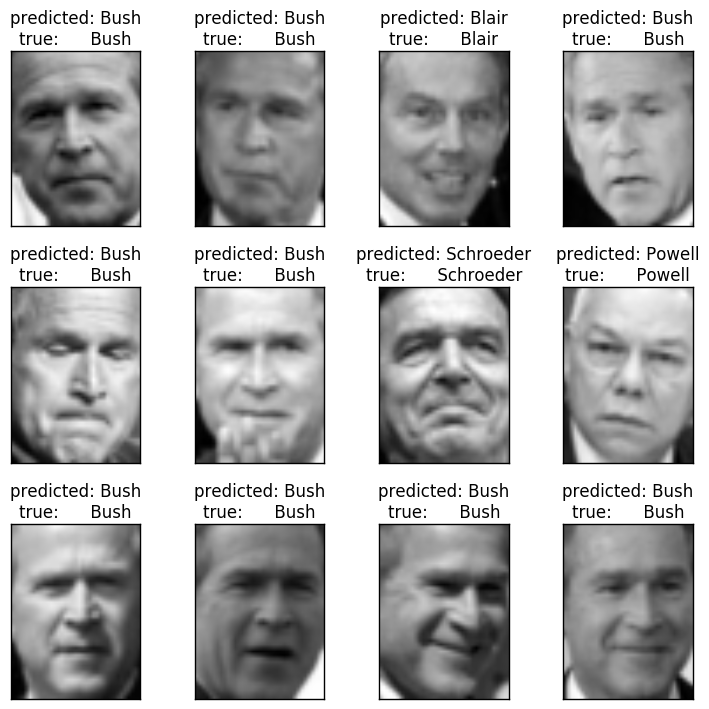

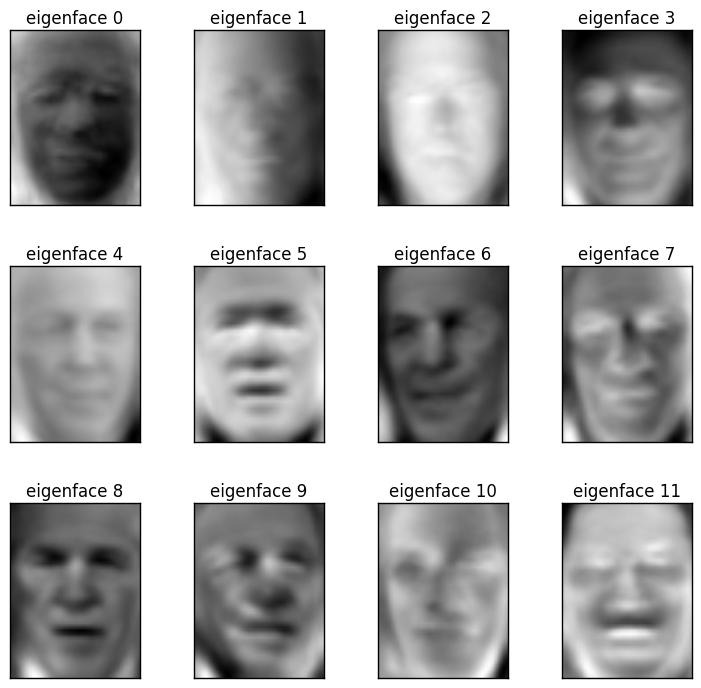

In [18]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

eigenfaces_titles = ['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenfaces_titles, h, w)

plt.show()